In [57]:
# import kagglehub
# from matplotlib.lines import lineStyles
#
# kaggle_dataset_source = "spaceship-titanic"


In [58]:
# path = kagglehub.dataset_download("spaceship-titanic")
#
# print("Dataset local -path: ", path)

In [59]:
# import zipfile
# import os
# source_file = "spaceship-titanic.zip"
# extract_dir = "dataset"
#
# with zipfile.ZipFile(source_file, "r") as zip_ref:
#     zip_ref.extractall(extract_dir)
#
# print("extracted dataset: ", extract_dir)
# print(os.listdir(extract_dir))

In [60]:
sample_path = "./dataset/sample_submission.csv"
train_path = "./dataset/train.csv"
test_path = "./dataset/test.csv"

## I. Read Dataset

In [61]:
import pandas as pd

df_train = pd.read_csv(train_path)
df_test = pd.read_csv(test_path)

print(df_train)
print(df_test)

     PassengerId HomePlanet CryoSleep     Cabin    Destination   Age    VIP  \
0        0001_01     Europa     False     B/0/P    TRAPPIST-1e  39.0  False   
1        0002_01      Earth     False     F/0/S    TRAPPIST-1e  24.0  False   
2        0003_01     Europa     False     A/0/S    TRAPPIST-1e  58.0   True   
3        0003_02     Europa     False     A/0/S    TRAPPIST-1e  33.0  False   
4        0004_01      Earth     False     F/1/S    TRAPPIST-1e  16.0  False   
...          ...        ...       ...       ...            ...   ...    ...   
8688     9276_01     Europa     False    A/98/P    55 Cancri e  41.0   True   
8689     9278_01      Earth      True  G/1499/S  PSO J318.5-22  18.0  False   
8690     9279_01      Earth     False  G/1500/S    TRAPPIST-1e  26.0  False   
8691     9280_01     Europa     False   E/608/S    55 Cancri e  32.0  False   
8692     9280_02     Europa     False   E/608/S    TRAPPIST-1e  44.0  False   

      RoomService  FoodCourt  ShoppingMall     Spa 

In [62]:
df_train.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name', 'Transported'],
      dtype='object')

In [63]:
df_train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [64]:
df_test.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [65]:
df_train.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [66]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [67]:
print(df_train.shape)
print(df_test.shape)

(8693, 14)
(4277, 13)


## II. Import neccessary libraries

In [68]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import warnings

from sklearn.model_selection import cross_val_score, StratifiedKFold

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression

from sklearn.ensemble import RandomForestClassifier

from xgboost import XGBClassifier

from lightgbm import LGBMClassifier
import lightgbm as lgb

import os

warnings.filterwarnings('ignore')



## Data Preprocessing

In [69]:
df_train = df_train.drop_duplicates()

In [70]:
df_train[df_train.isnull().sum(axis=1) >= 3]

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
1203,1284_01,Mars,True,F/247/S,NaN,NaN,False,0.0,NaN,0.0,0.0,0.0,Hal Knité,True
2639,2822_02,Earth,NaN,G/450/S,TRAPPIST-1e,5.0,NaN,0.0,0.0,0.0,0.0,NaN,Salley Harverez,False
2762,2970_01,Earth,False,NaN,TRAPPIST-1e,NaN,False,740.0,82.0,6.0,NaN,1.0,Dwin Adkinson,False
3072,3315_01,Earth,NaN,F/627/S,TRAPPIST-1e,15.0,False,10.0,0.0,99.0,NaN,2031.0,NaN,False
3535,3790_01,NaN,True,G/620/P,TRAPPIST-1e,13.0,False,0.0,NaN,0.0,NaN,0.0,Trick Meyersones,True
3882,4167_01,Earth,False,NaN,PSO J318.5-22,NaN,NaN,0.0,440.0,0.0,0.0,334.0,Ninaha Deckerson,False
4164,4446_05,Europa,NaN,B/175/S,TRAPPIST-1e,33.0,False,0.0,4017.0,NaN,NaN,2260.0,Phah Chocaters,True
4548,4840_01,NaN,True,F/915/S,TRAPPIST-1e,36.0,False,0.0,0.0,NaN,0.0,0.0,NaN,True
5208,5555_01,NaN,False,G/896/S,NaN,43.0,NaN,1.0,0.0,213.0,7.0,701.0,Winia Blanglison,True
5409,5777_01,Earth,NaN,F/1199/P,PSO J318.5-22,46.0,NaN,559.0,25.0,NaN,22.0,765.0,Katen River,False


In [71]:
df_train = df_train[df_train.isnull().sum(axis=1) < 3]

### 2. Standard data, Data Imputation

In [72]:
df_train["HomePlanet"].fillna(df_train["HomePlanet"].mode()[0], inplace=True)
df_train["CryoSleep"].fillna(False, inplace=True)

df_train["Cabin"].fillna("Unknown", inplace = True)

df_train['Destination'].fillna('Unknown',inplace = True)
df_train['Age'].fillna(df_train['Age'].median(),inplace = True)
df_train['VIP'].fillna(False,inplace=True)
df_train['RoomService'].fillna(0,inplace = True)
df_train['FoodCourt'].fillna(0,inplace = True)
df_train['ShoppingMall'].fillna(0,inplace = True)
df_train['Spa'].fillna(0,inplace = True)
df_train['VRDeck'].fillna(0,inplace = True)

### 3. Feature Engineering

In [73]:
df_train[["Deck", "Num", "Side"]] = df_train["Cabin"].str.split("/", expand=True)

df_train.loc[df_train["Cabin"] == "Unknown", ["Deck", "Num", "Side"]] = "Unknown"


In [74]:
df_test[['Deck','Num','Side']] = df_test['Cabin'].str.split('/',expand = True)
df_test.loc[df_test['Cabin']=='Unknown',['Deck','Num','Side']] = 'Unknown'

In [75]:
df_train.drop(columns = ["Cabin"], inplace = True)
df_test.drop(columns = ["Cabin"], inplace = True)


In [76]:
df_train["TotalSpent"] = df_train["RoomService"] + df_train["FoodCourt"] + df_train["ShoppingMall"] + df_train["Spa"] + df_train["VRDeck"]

df_test['TotalSpent'] = df_test['RoomService'] + df_test['FoodCourt'] + df_test['ShoppingMall'] + df_test['Spa'] + df_test['VRDeck']

In [77]:
df_train["SpentSomething"] = (df_train["TotalSpent"] > 0).astype(int)

df_test["SpentSomething"] = (df_test["TotalSpent"] > 0).astype(int)

### 4. Data Visualization

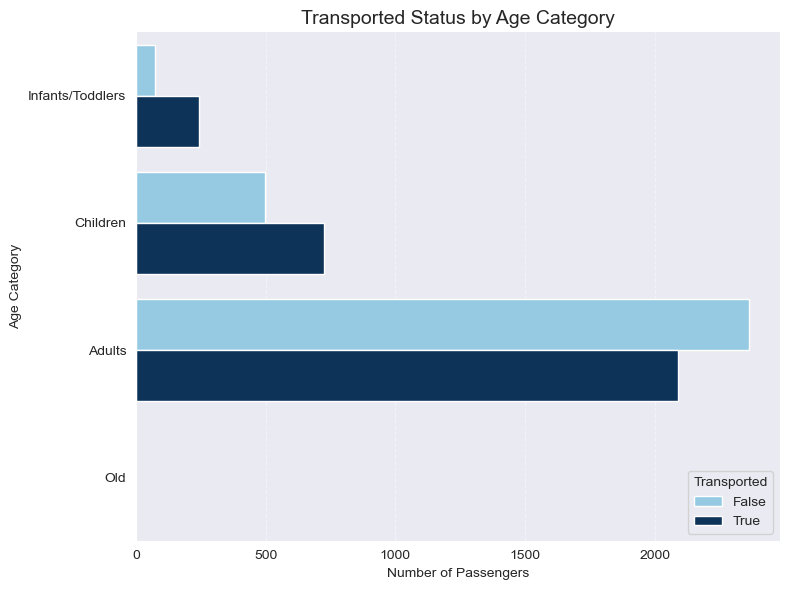

In [78]:
def categorize_age(x):
    if x < 3:
        return "Infants/Toddlers"
    elif 3 <= x < 18:
        return "Children"
    elif 18 <= x < 35:
        return "Adults"
    else:
        return "Olds"

df_train["age_cat"] = df_train["Age"].apply(categorize_age)

age_dist = df_train.groupby(["age_cat", "Transported"]).size().reset_index().rename(columns = {0: "Count"})

plt.figure(figsize = (8,6))

sns.barplot(
    data = age_dist,
    y = "age_cat",
    x = "Count",
    hue = "Transported",
    order = ["Infants/Toddlers", "Children", "Adults", "Old"],
    palette = {False: "#89CFF0", True: "#003366"}

)

plt.title("Transported Status by Age Category", fontsize = 14)

plt.xlabel("Number of Passengers")
plt.ylabel("Age Category")


ax = plt.gca()
ax.spines["top"].set_visible(False)
ax.spines['right'].set_visible(False)
plt.grid(axis='x', linestyle='--', alpha=0.4)

plt.legend(title = "Transported", loc="lower right")
plt.tight_layout()

plt.show()


df_train.drop(columns=["age_cat"], inplace = True)


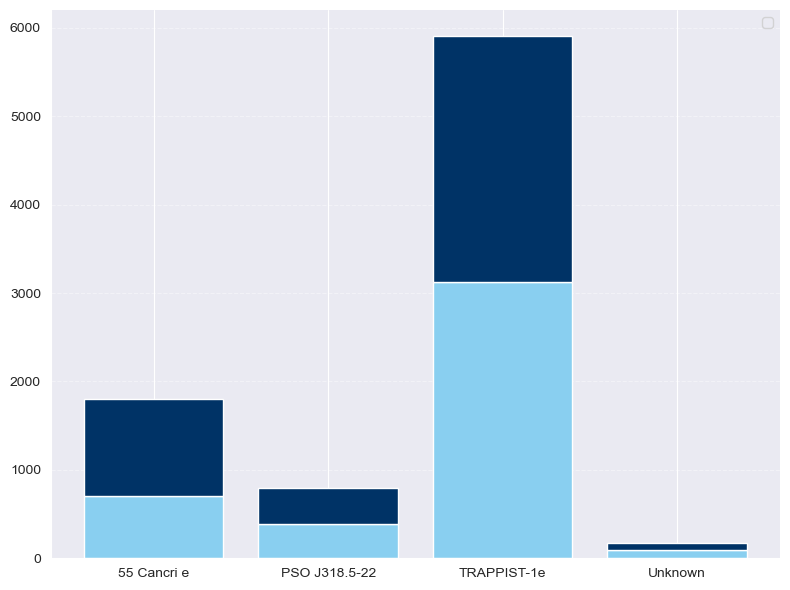

In [79]:
aggregate_df = df_train.groupby(["Destination", "Transported"]).size().reset_index(name="Count")

pivot_df = aggregate_df.pivot_table(index="Destination", columns = "Transported", values = "Count").fillna(0)

colors = {False: '#89CFF0', True: '#003366'}

plt.figure(figsize=(8, 6))
plt.bar(pivot_df.index, pivot_df[False], color = colors[False], label="False")
plt.bar(pivot_df.index, pivot_df[True], color = colors[True], label="True", bottom=pivot_df[False])

plt.title("", fontsize=14)
plt.xlabel("")
plt.ylabel("")

plt.legend("")

plt.grid(axis="y", linestyle="--", alpha=0.4)

plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)

plt.tight_layout()

plt.show()

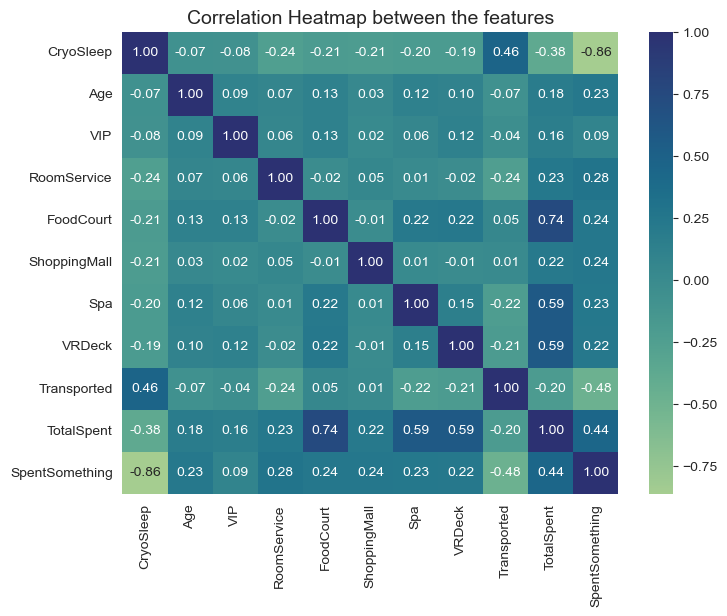

In [80]:
plt.figure(figsize=(8,6))

sns.heatmap(df_train.corr(numeric_only = True), annot = True, fmt = ".2f", cmap = "crest")

plt.title("Correlation Heatmap between the features", fontsize=14)

plt.show()


In [81]:


cryosleep_groups = df_train.groupby("CryoSleep")["Transported"].value_counts()

cryosleep_groups



CryoSleep  Transported
False      False          3754
           True           1891
True       True           2477
           False           554
Name: count, dtype: int64

In [82]:
cryosleep_groups = cryosleep_groups.unstack()

cryosleep_groups

Transported,False,True
CryoSleep,,
False,3754,1891
True,554,2477


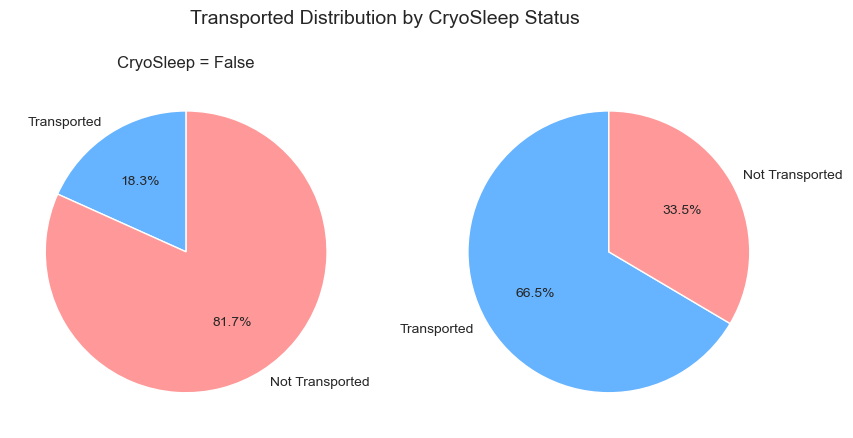

In [83]:
# plot pie chart

fig, axes = plt.subplots(1, 2, figsize=(10, 5))

axes[0].pie(
    cryosleep_groups.loc[True],
    labels = ["Transported", "Not Transported"],
    autopct = "%1.1f%%",
    startangle = 90,
    colors = ["#66b3ff", "#ff9999"],
)

axes[0].set_title("CryoSleep = True")


axes[0].set_title("CryoSleep = True")

axes[1].pie(
    cryosleep_groups.loc[False],
    labels = ["Transported", "Not Transported"],
    autopct = "%1.1f%%",
    startangle = 90,
    colors = ["#66b3ff", "#ff9999"],
)
axes[0].set_title("CryoSleep = False")

plt.suptitle("Transported Distribution by CryoSleep Status", fontsize = 14)

plt.show()





In [84]:
ct = pd.crosstab(df_train["HomePlanet"], df_train["Transported"], normalize = "index")

ct

Transported,False,True
HomePlanet,,
Earth,0.572532,0.427468
Europa,0.341475,0.658525
Mars,0.477221,0.522779


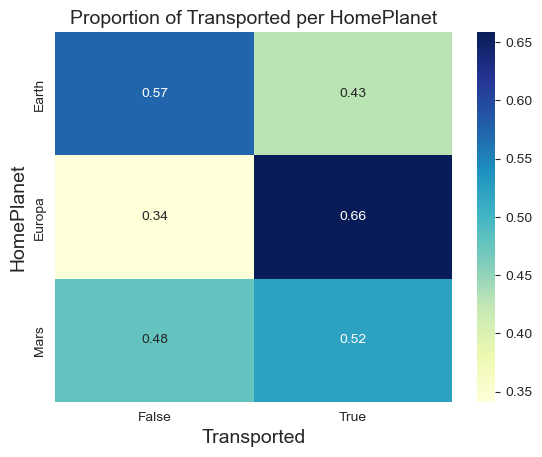

In [85]:
sns.heatmap(ct, annot=True, cmap = "YlGnBu", fmt=".2f")

plt.title("Proportion of Transported per HomePlanet", fontsize = 14)
plt.xlabel("Transported", fontsize = 14)
plt.ylabel("HomePlanet", fontsize = 14)

plt.show()

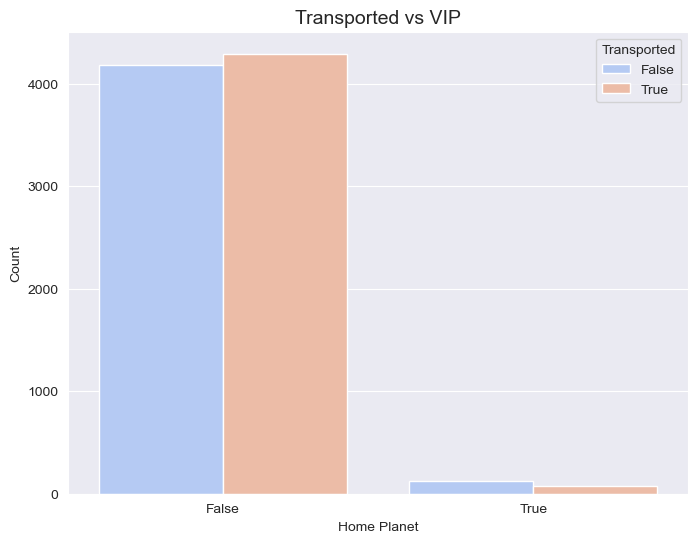

In [86]:
plt.figure(figsize= (8, 6))
sns.countplot(data=df_train, x = "VIP", hue = "Transported", palette="coolwarm")

plt.title("Transported vs VIP", fontsize = 14)
plt.xlabel("Home Planet")
plt.ylabel("Count")

plt.show()

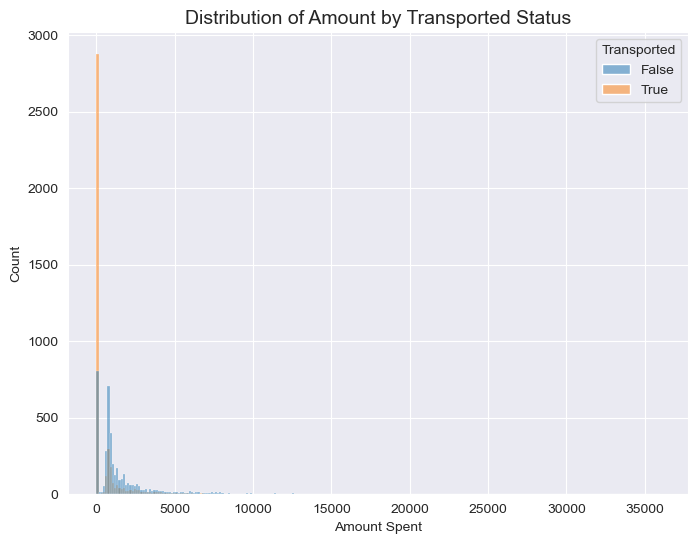

In [87]:
plt.figure(figsize = (8, 6))

sns.histplot(data = df_train, x = "TotalSpent", hue = "Transported")

plt.title("Distribution of Amount by Transported Status", fontsize = 14)

plt.xlabel("Amount Spent")
plt.ylabel("Count")
plt.show()

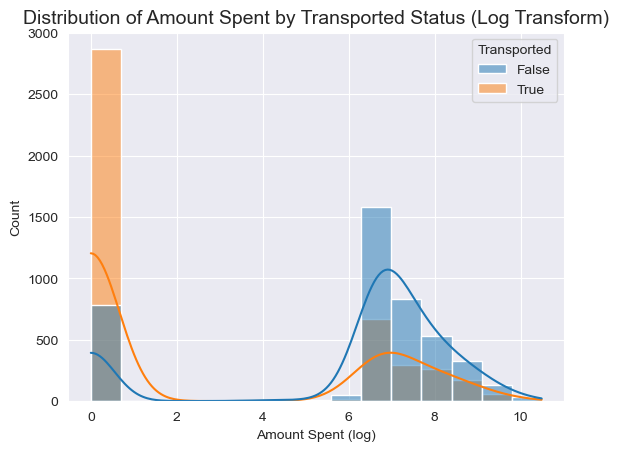

In [88]:
df_train["TotalSpent_log"] = np.log1p(df_train["TotalSpent"])

df_test["TotalSpent_log"] = np.log1p(df_test["TotalSpent"])

sns.histplot(data = df_train, x = "TotalSpent_log", hue= "Transported", kde=True)

plt.title("Distribution of Amount Spent by Transported Status (Log Transform)", fontsize=14)

plt.xlabel("Amount Spent (log)")
plt.ylabel("Count")

plt.show()

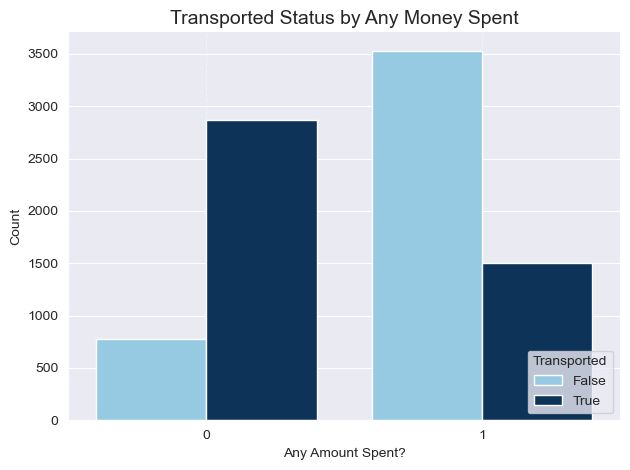

In [89]:
spent_groups = df_train.groupby(["SpentSomething", "Transported"]).size().reset_index().rename(columns = {0: "Count"})
plt.title("Transported Status by Any Money Spent", fontsize = 14)

plt.xlabel("Any Amount Spent?")
plt.ylabel("Count")
sns.barplot(
    data = spent_groups,
    x = "SpentSomething",
    y = "Count",
    hue = "Transported",
    palette = {False: "#89CFF0", True: "#003366"}
)

ax = plt.gca()

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

plt.grid(axis="x", linestyle="--", alpha=0.4)


plt.legend(title="Transported", loc="lower right")
plt.tight_layout()
plt.show()


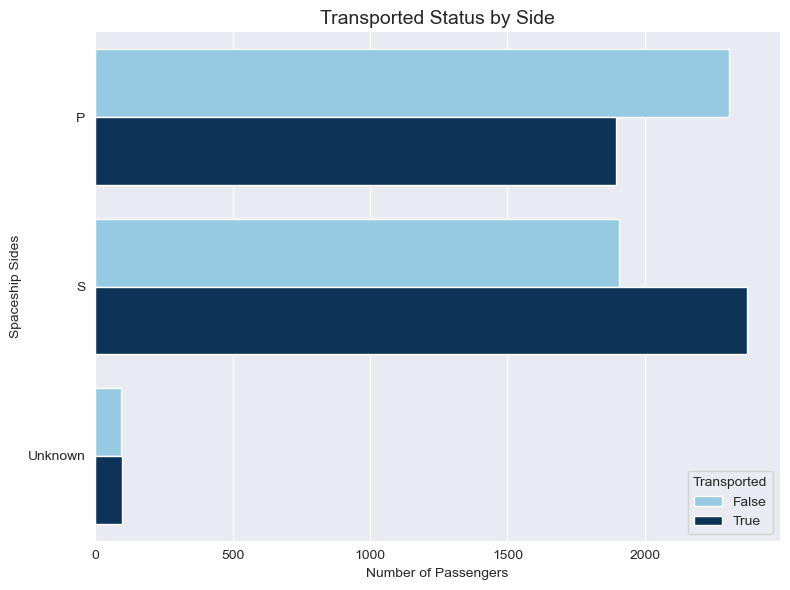

In [90]:
side_group = df_train.groupby("Side")["Transported"].value_counts().reset_index()

plt.figure(figsize=(8, 6))

sns.barplot(
    data = side_group,
    y = "Side",
    x = "count",
    hue = "Transported",
    palette = {False: "#89CFF0", True: "#003366"},

)

plt.title("Transported Status by Side", fontsize = 14)
plt.xlabel("Number of Passengers")
plt.ylabel("Spaceship Sides")

ax = plt.gca()
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

plt.legend(title="Transported", loc="lower right")

plt.tight_layout()
plt.show()





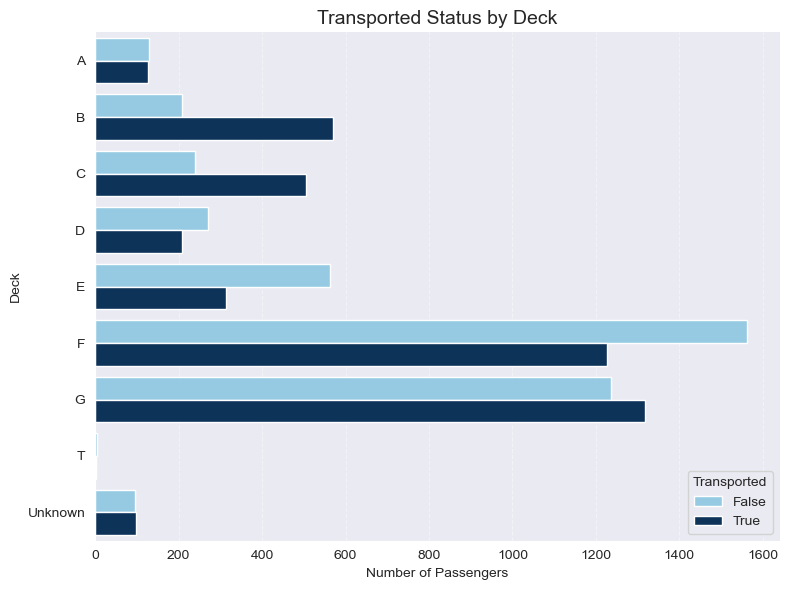

In [91]:
deck_group = df_train.groupby("Deck")["Transported"].value_counts().reset_index()

plt.figure(figsize=(8, 6))

sns.barplot(data=deck_group, y = "Deck", x = "count", hue="Transported", palette={False: "#89CFF0", True: "#003366"})

plt.title("Transported Status by Deck", fontsize = 14)
plt.xlabel("Number of Passengers")
plt.ylabel("Deck")

ax = plt.gca()

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

plt.grid(axis="x", linestyle="--", alpha=0.4)

plt.legend(title="Transported", loc="lower right")
plt.tight_layout()
plt.show()




## III. Model Building

In [92]:
cols = ["HomePlanet", "Destination", "Deck", "Side", "Num"]

df_train[cols].head()



,HomePlanet,Destination,Deck,Side,Num
0,Europa,TRAPPIST-1e,B,P,0
1,Earth,TRAPPIST-1e,F,S,0
2,Europa,TRAPPIST-1e,A,S,0
3,Europa,TRAPPIST-1e,A,S,0
4,Earth,TRAPPIST-1e,F,S,1


In [93]:
df_train[cols].info()

<class 'pandas.core.frame.DataFrame'>
Index: 8676 entries, 0 to 8692
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   HomePlanet   8676 non-null   object
 1   Destination  8676 non-null   object
 2   Deck         8676 non-null   object
 3   Side         8676 non-null   object
 4   Num          8676 non-null   object
dtypes: object(5)
memory usage: 406.7+ KB


In [94]:
df_train[cols].value_counts()

HomePlanet  Destination  Deck     Side     Num    
Earth       TRAPPIST-1e  Unknown  Unknown  Unknown    66
Europa      55 Cancri e  Unknown  Unknown  Unknown    32
Mars        TRAPPIST-1e  Unknown  Unknown  Unknown    32
Europa      TRAPPIST-1e  Unknown  Unknown  Unknown    28
Earth       55 Cancri e  Unknown  Unknown  Unknown    16
                                                      ..
Mars        Unknown      F        P        265         1
                                           1765        1
Earth       55 Cancri e  E        P        106         1
                         D        S        245         1
                                           15          1
Name: count, Length: 7288, dtype: int64

In [95]:
df_train[cols].describe()

,HomePlanet,Destination,Deck,Side,Num
count,8676,8676,8676,8676,8676
unique,3,4,9,3,1818
top,Earth,TRAPPIST-1e,F,S,Unknown
freq,4791,5906,2789,4279,194


In [96]:
for col in cols:
    print("------------------BEGIN------------------")
    print("Column: ",col, " =>")
    print("[", "]--|--[".join(val for val in df_train[col].unique()), "]")
    print("------------------END--------------------\n\n")

------------------BEGIN------------------
Column:  HomePlanet  =>
[ Europa]--|--[Earth]--|--[Mars ]
------------------END--------------------


------------------BEGIN------------------
Column:  Destination  =>
[ TRAPPIST-1e]--|--[PSO J318.5-22]--|--[55 Cancri e]--|--[Unknown ]
------------------END--------------------


------------------BEGIN------------------
Column:  Deck  =>
[ B]--|--[F]--|--[A]--|--[G]--|--[Unknown]--|--[E]--|--[D]--|--[C]--|--[T ]
------------------END--------------------


------------------BEGIN------------------
Column:  Side  =>
[ P]--|--[S]--|--[Unknown ]
------------------END--------------------


------------------BEGIN------------------
Column:  Num  =>
[ 0]--|--[1]--|--[2]--|--[3]--|--[Unknown]--|--[4]--|--[5]--|--[6]--|--[8]--|--[9]--|--[10]--|--[11]--|--[7]--|--[12]--|--[13]--|--[14]--|--[15]--|--[16]--|--[17]--|--[18]--|--[20]--|--[19]--|--[23]--|--[24]--|--[21]--|--[25]--|--[27]--|--[22]--|--[29]--|--[30]--|--[31]--|--[26]--|--[32]--|--[28]--|--[37]

In [97]:
for col in cols:
    le = LabelEncoder()
    df_train[col] = le.fit_transform(df_train[col])
    df_test[col] = le.fit_transform(df_test[col])


In [99]:
df_train[cols].head()

,HomePlanet,Destination,Deck,Side,Num
0,1,2,1,0,0
1,0,2,5,1,0
2,1,2,0,1,0
3,1,2,0,1,0
4,0,2,5,1,1


In [100]:
feat_cols = ['Age','Destination','CryoSleep','Age','VIP','Deck','SpentSomething','TotalSpent_log']
label_col = "Transported"
x_train = df_train[feat_cols]
y_train = df_train["Transported"]

x_test = df_test[feat_cols]

In [101]:
x_train.head()

,Age,Destination,CryoSleep,Age,VIP,Deck,SpentSomething,TotalSpent_log
0,39.0,2,False,39.0,False,1,0,0.000000
1,24.0,2,False,24.0,False,5,1,6.602588
2,58.0,2,False,58.0,True,0,1,9.248021
3,33.0,2,False,33.0,False,0,1,8.551981
4,16.0,2,False,16.0,False,5,1,6.995766


In [102]:
# Standard scalars features
ss = StandardScaler()

x_train_std = ss.fit_transform(x_train)
x_test_std = ss.fit_transform(x_test)

In [104]:
x_train_std[0:5]

array([[ 0.71132558,  0.57888794, -0.73275872,  0.71132558, -0.15321647,
        -1.84002787, -1.17511706, -1.15332779],
       [-0.33442475,  0.57888794, -0.73275872, -0.33442475, -0.15321647,
         0.33254723,  0.85097905,  0.63643854],
       [ 2.03594265,  0.57888794, -0.73275872,  2.03594265,  6.52671356,
        -2.38317164,  0.85097905,  1.35353735],
       [ 0.29302544,  0.57888794, -0.73275872,  0.29302544, -0.15321647,
        -2.38317164,  0.85097905,  1.16486137],
       [-0.89215826,  0.57888794, -0.73275872, -0.89215826, -0.15321647,
         0.33254723,  0.85097905,  0.74301754]])

In [106]:
print("Mean: ", ss.mean_)
print("Scale: ", ss.scale_)
print("Variance: ", ss.var_)

Mean:  [2.86581462e+01 1.53752630e+00 3.69024857e-01 2.86581462e+01
 1.76864245e-02 4.43885901e+00 5.16951134e-01 4.26589615e+00]
Scale:  [14.17737785  0.8275741   0.48254068 14.17737785  0.13180901  1.78655656
  0.49971258  3.69691633]
Variance:  [2.00998043e+02 6.84878894e-01 2.32845512e-01 2.00998043e+02
 1.73736149e-02 3.19178434e+00 2.49712659e-01 1.36671903e+01]


In [107]:
models = {
    "LogisticRegression": LogisticRegression(),
    "RandomForest": RandomForestClassifier(),
    "LightGBM": LGBMClassifier(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric="logloss"),
}

In [108]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [110]:
model_score = {}

for name, model in models.items():
    scores = cross_val_score(model, x_train_std, y_train, cv=cv)
    model_score[name] = scores
    print(f"{name}: Mean Accuracy: {scores.mean():.4f} | Std = {scores.std():.4f}")


LogisticRegression: Mean Accuracy: 0.7325 | Std = 0.0078
RandomForest: Mean Accuracy: 0.7010 | Std = 0.0069
[LightGBM] [Info] Number of positive: 3494, number of negative: 3446
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000123 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 437
[LightGBM] [Info] Number of data points in the train set: 6940, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.503458 -> initscore=0.013833
[LightGBM] [Info] Start training from score 0.013833
[LightGBM] [Info] Number of positive: 3495, number of negative: 3446
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000089 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 439
[LightGBM] [I

In [111]:
lgbm = LGBMClassifier(random_state=42)
lgbm.fit(x_train_std, y_train)
y_pred = lgbm.predict(x_test_std)

[LightGBM] [Info] Number of positive: 4368, number of negative: 4308
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000414 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 439
[LightGBM] [Info] Number of data points in the train set: 8676, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.503458 -> initscore=0.013831
[LightGBM] [Info] Start training from score 0.013831


In [112]:
submission = pd.DataFrame({
    "PassengerId": df_test["PassengerId"],
    "Transported": y_pred
})
submission.to_csv("submission.csv", index=False)
print("Submission file created successfully: submission.csv")
submission.head()


Submission file created successfully: submission.csv


,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,False
4,0023_01,False
